In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('../data/annotated_gold_standard.csv')
df.head()

,id,subreddit,parent_id,date,char_len,clean_body,vader,weak_label,llm_type,llm_sentiment
0,fuy5wsx,geopolitics,NaN,2020-06-15,32,good stuff. thanks for posting.,0.7003,positive,Other,NaN
1,fcu4v0y,geopolitics,NaN,2020-01-02,2799,> a fault of the americans themselves for allo...,0.9814,positive,Other,NaN
2,jnwlcxz,geopolitics,NaN,2023-06-12,258,hilarious? westerner diplomacy maybe? ignorant...,0.8426,positive,Other,NaN
3,k5feyy1,geopolitics,NaN,2023-10-18,262,but you’d trust hamas? “i don’t know who did t...,0.8720,positive,Opinion,Negative
4,fmequr0,geopolitics,NaN,2020-04-04,224,i think we're forgetting the middle east will ...,0.7184,positive,Opinion,Neutral


In [3]:
# If llm_type is not 'Opinion' or 'Question', change it to 'Other'
df['llm_type'] = df['llm_type'].apply(lambda x: x if x in ['Opinion', 'Question'] else 'Other')
df['llm_type'].value_counts()

llm_type
Other       3587
Opinion     3051
Question     562
Name: count, dtype: int64

In [4]:
# Out of the opinions, # how many are positive, negative, or neutral?
ops = df['llm_type'] == 'Opinion'

ops_df = df[ops]

ops_df['llm_sentiment'].value_counts()

llm_sentiment
Negative              2117
Neutral                687
Positive               245
Negative/Neutral         1
Nostalgic/Positive       1
Name: count, dtype: int64

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_2532/749966406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ops_df['llm_sentiment'] = ops_df['llm_sentiment'].str.lower()


Text(0.5, 1.0, 'Confusion Matrix: VADER vs. LLM Sentiment')

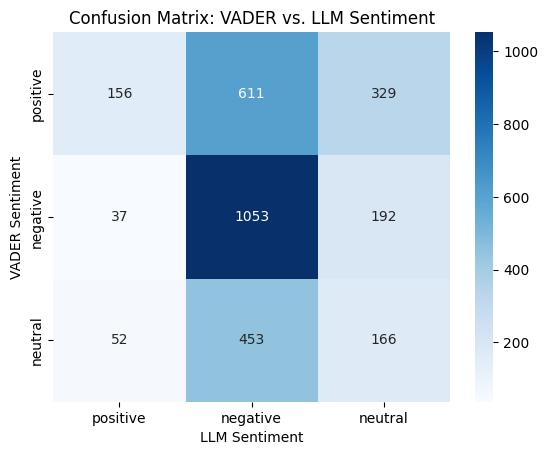

In [5]:
# Lower case the text
ops_df['llm_sentiment'] = ops_df['llm_sentiment'].str.lower()

# Confusion matrix for VADER vs. LLM sentiment
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ops_df['weak_label'], ops_df['llm_sentiment'], labels=['positive', 'negative', 'neutral'])
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative', 'neutral'],
            yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('LLM Sentiment')
plt.ylabel('VADER Sentiment')
plt.title('Confusion Matrix: VADER vs. LLM Sentiment')

### VADER is clearly too inconsistent for pre-labeling. 

A new LLM powered pipeline will do the annotation for the entire corpus.

In [6]:
from sqlalchemy import create_engine

# Create a connection to the database
engine = create_engine("sqlite:///../reddit_posts.db")

In [7]:
# Query table
df = pd.read_sql_query("SELECT id, clean_body FROM comments_labeled", engine)

# Save the DataFrame to a CSV file
df.to_csv('../data/comments_labeled.csv', index=False)
